# Diamond Store Predictive Analytics

This is a series of Predictive Analytics of a classic datasets from tidyverse that contains the prices and other attributes of almost 54.000. 

In [146]:
# Importing All the Library
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import os
import pickle
import scipy.stats as stats
import string

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings('ignore')

In [147]:
# Loading the DataSet
url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv'
diamonds = pd.read_csv(url)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Kaggle Infomation**

Based on information on Kaggle, Here are some information about our features:

*   `price`: diamond price in US Dollars ($) our target feature

*   `carat`: weight of the diamond (0.2--5.01)

*   `cut`: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

*   `color`: diamond colour, from J (worst) to D (best)

*   `clarity`: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

*   `x`: length in mm (0--10.74)

*   `y`: width in mm (0--58.9)

*   `z`: depth in mm (0--31.8)

*   `depth`: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

*   `table`: width of top of diamond relative to widest point (43--95)



In [148]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Conclusions:


* There are 3 columns with object type: `color`, `cut`, `clarity`


* There also 6 columns with float64 type: `carat`, `depth`, `table`, `x`, `y`, `z`. 

* And our target columns(`price`) have int64 column dtype.


In [149]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Data Cleaning(Outliers and Missing Values Handling)

## Handling Missing Values

In [150]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


If we look again at `x`, `y`, `z` columns, we can see that the minimum value is zero and there is nothing such as zero dimension. So we can assume that was a missing values.

Let's check the zero values.

In [151]:
x = (diamonds.x == 0).sum()
y = (diamonds.y == 0).sum()
z = (diamonds.z == 0).sum()

print('0 values on column x:', x)
print('0 values on column y:', y)
print('0 values on column z:', z)

0 values on column x: 8
0 values on column y: 7
0 values on column z: 20


`z` column has the most zero value. lets do a little check up

In [152]:
diamonds[diamonds['z'] == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


- In some record, there are zero values in `x`, `y`, `z` at the same time.

- Let's drop the every zero values to clean our data.

In [153]:
# check df shape before dropping zero values
print(f"df BEFORE dropping zero values:\n{diamonds.shape}")

# drop rows with x,y,z == 0
diamonds_dropped = diamonds.loc[(diamonds[['x','y','z']] != 0).all(axis=1)]

# check df shape after dropping zero values
print(f"\ndf AFTER dropping zero values:\n{diamonds_dropped.shape}")

df BEFORE dropping zero values:
(53940, 10)

df AFTER dropping zero values:
(53920, 10)


- In total, we dropped 20 rows of missing values. 

- For handling missing values, we can actually fill the missing values with their statistical stats such as **Mean**, **Median** and **Mode** of its column instead of droppping some potential information.

- However in this case, the missing values is only 20 rows of the total 53.940 rows. It's actually not a big deal to drop the missing values.

## Handling Outliers

Outlier is an observation that lies an abnormal distance from other values in a random sample from a population.

In [154]:
diamonds_distr = pd.DataFrame({
    'columns': diamonds_dropped.describe().columns,
    'skew': diamonds_dropped.skew(axis=0)
}).reset_index(drop=True)

diamonds_distr['distribution'] = np.where((diamonds_distr['skew'] < 0.5) & (diamonds_distr['skew'] > -0.5), 'Normal', 'Skew')
diamonds_distr

,columns,skew,distribution
0,carat,1.116207,Skew
1,depth,-0.081726,Normal
2,table,0.796799,Skew
3,price,1.618349,Skew
4,x,0.398348,Normal
5,y,2.462211,Skew
6,z,1.585490,Skew


There are 5 columns with skewed distribution:
1. `carat`
2. `table`
3. `price`
4. `y`
5. `z`

And every one of them are right skewed.

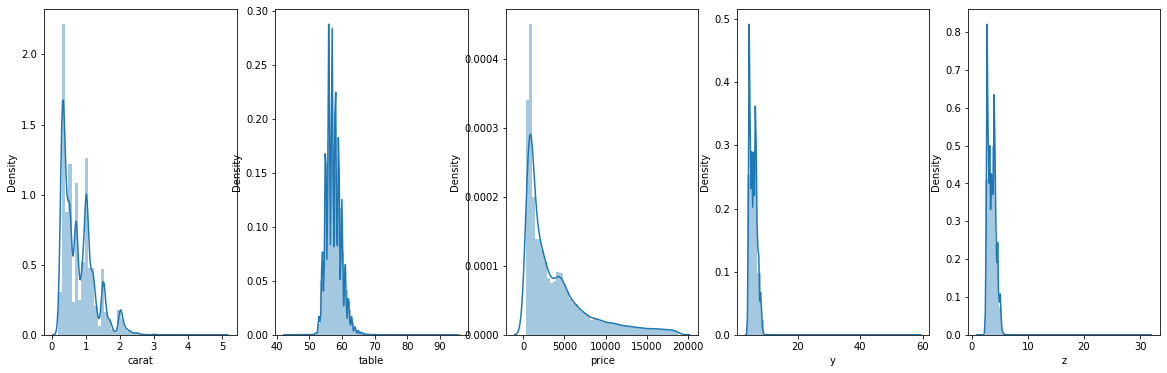

In [155]:
def skew_plot(cols):
  fig, ax = plt.subplots(1,5, figsize=(20,6))
  for i, col in enumerate(cols):
    sns.distplot(diamonds_dropped[col], ax=ax[i])

  plt.show()

skewed_cols = diamonds_distr[diamonds_distr['distribution'] == 'Skew']['columns'].tolist()

skew_plot(skewed_cols)

In [156]:
def find_normal_boundaries(df, variable):
  upper_boundary = df[variable].mean() + 3 * df[variable].std()
  lower_boundary = df[variable].mean() - 3 * df[variable].std()
  return upper_boundary, lower_boundary

def find_skewed_boundaries(df, variable, distance):
  IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

  lower = df[variable].quantile(0.25) - distance * IQR
  upper = df[variable].quantile(0.75) + distance * IQR
  return upper, lower

In [157]:
j = 0
outliers = {}
for i in diamonds_dropped.describe().columns:
  if diamonds_distr['distribution'].loc[diamonds_distr['columns'] == i].values[0] == 'Normal':
    upper_boundary, lower_boundary = find_normal_boundaries(diamonds_dropped, i)
    print(f"Boundary lower and upper {i}: {lower_boundary, upper_boundary}")
    outliers[f"outliers{j}"] = np.where(diamonds_dropped[i] > upper_boundary, True, np.where(diamonds_dropped[i] < lower_boundary, True, False))
  else:
    upper_boundary, lower_boundary = find_skewed_boundaries(diamonds_dropped, i, 1.5)
    print(f"Batas lower dan upper {i}: {lower_boundary, upper_boundary}")
    outliers[f"outliers{j}"] = np.where(diamonds_dropped[i] > upper_boundary, True, np.where(diamonds_dropped[i] < lower_boundary, True, False))
  print('='*30)
  j+=1

Batas lower dan upper carat: (-0.5599999999999999, 2.0)
Boundary lower and upper depth: (57.45252087049751, 66.04650731941348)
Batas lower dan upper table: (51.5, 63.5)
Batas lower dan upper price: (-5612.375, 11884.625)
Boundary lower and upper x: (2.3733583772237585, 9.089895331975054)
Batas lower dan upper y: (1.9899999999999993, 9.27)
Batas lower dan upper z: (1.2150000000000003, 5.734999999999999)


In order to handling outliers, we are going to make some rules like:

- If outliers is between 0 - 5%, we are going to use trimming

- If outliers is between 5 - 15%, we are going to use capping/windsorizer

In [158]:
for i, (k,v) in enumerate(outliers.items()):
  diamonds_distr_handling = diamonds_dropped.loc[~outliers[k]]
  diamonds_distr.loc[i, 'trimmed_row'] = diamonds_dropped.shape[0] - diamonds_distr_handling.shape[0]
  diamonds_distr.loc[i, 'percentage'] = np.round(100-(diamonds_distr_handling.shape[0]/diamonds_dropped.shape[0]*100),2)
  diamonds_distr.loc[i, 'action'] = np.where(diamonds_distr.loc[i, 'percentage'] == 0, 'No Action',
                                    np.where(diamonds_distr.loc[i, 'percentage'] > 15, 'Capping/Windsorizer', 'Trimming'))

In [159]:
diamonds_distr

,columns,skew,distribution,trimmed_row,percentage,action
0,carat,1.116207,Skew,1883.0,3.49,Trimming
1,depth,-0.081726,Normal,685.0,1.27,Trimming
2,table,0.796799,Skew,604.0,1.12,Trimming
3,price,1.618349,Skew,3532.0,6.55,Trimming
4,x,0.398348,Normal,35.0,0.06,Trimming
5,y,2.462211,Skew,22.0,0.04,Trimming
6,z,1.585490,Skew,29.0,0.05,Trimming


- As we can see every columns has Trimming action, which mean we are going to trim all outliers in every numerical columns,

In [160]:
print(outliers.items())
outliers_tot = [False]*len(diamonds_dropped)

for col in outliers.keys():
  outliers_tot += outliers[col]

dict_items([('outliers0', array([False, False, False, ..., False, False, False])), ('outliers1', array([False, False,  True, ..., False, False, False])), ('outliers2', array([False, False,  True, ..., False, False, False])), ('outliers3', array([False, False, False, ..., False, False, False])), ('outliers4', array([False, False, False, ..., False, False, False])), ('outliers5', array([False, False, False, ..., False, False, False])), ('outliers6', array([False, False, False, ..., False, False, False]))])


In [161]:
diamonds_trimmed = diamonds_dropped.loc[~outliers_tot]

print(f"Total rows in diamonds dataset BEFORE trimmed: {diamonds_dropped.shape[0]}")
print(f"Total rows in X_train diamonds dataset trimmed: {diamonds_trimmed.shape[0]}")
print(f"% Outliers on the dataset: {100-(diamonds_trimmed.shape[0]/diamonds_dropped.shape[0]*100):.2f}%")

Total rows in diamonds dataset BEFORE trimmed: 53920
Total rows in X_train diamonds dataset trimmed: 49095
% Outliers on the dataset: 8.95%


In [162]:
def diagnostic_plot(df, variable, figsize=(16,4)):
  plt.figure(figsize=figsize)

  # Histogram
  plt.subplot(1,2,1)
  sns.histplot(df[variable], bins=30)
  plt.title("Histogram")

  # Boxplot
  plt.subplot(1,2,2)
  sns.boxplot(y=df[variable])
  plt.title('Boxplot')

  plt.show()

carat - Before Trimming


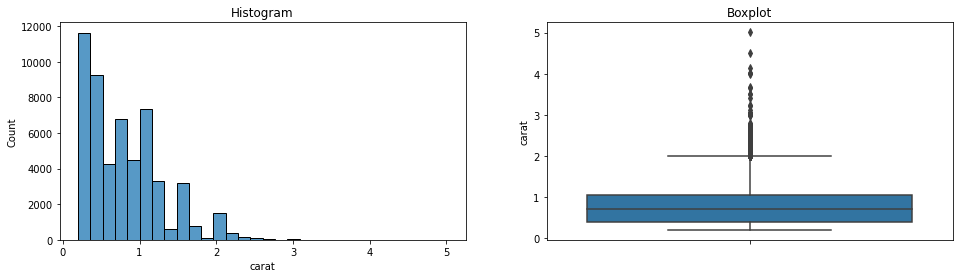


carat - After Trimming


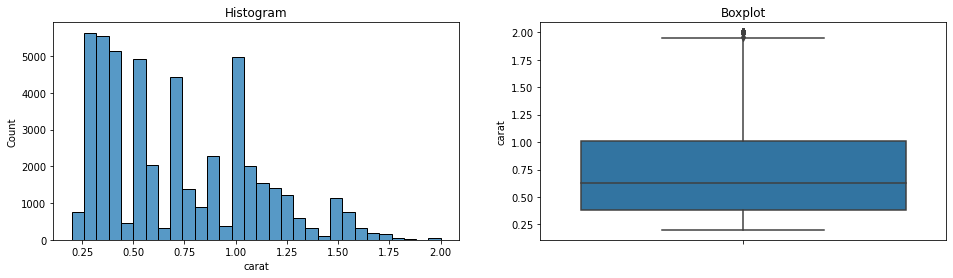

depth - Before Trimming


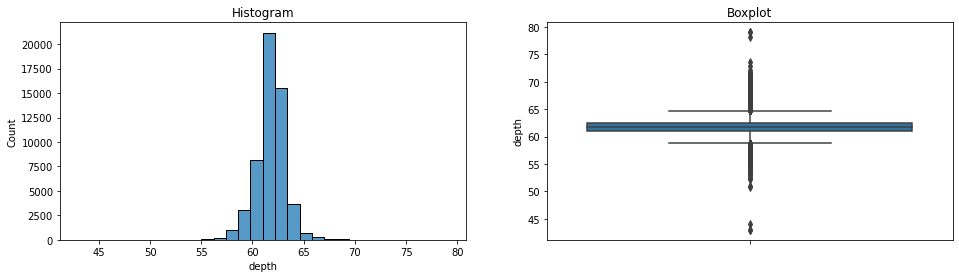


depth - After Trimming


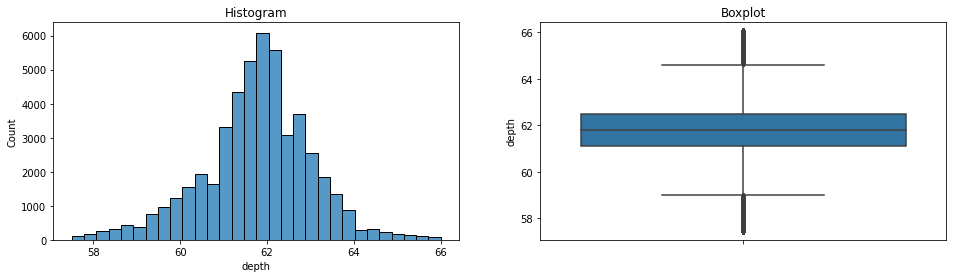

table - Before Trimming


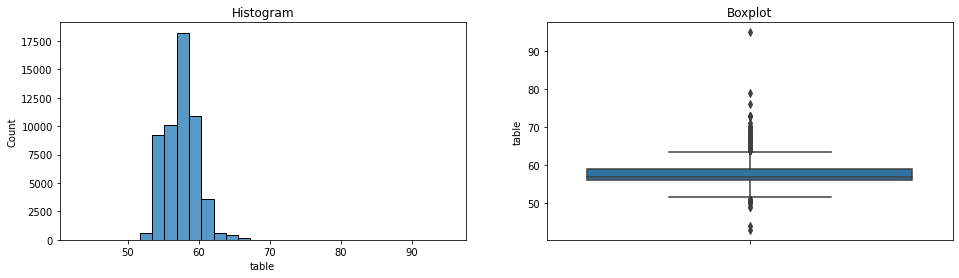


table - After Trimming


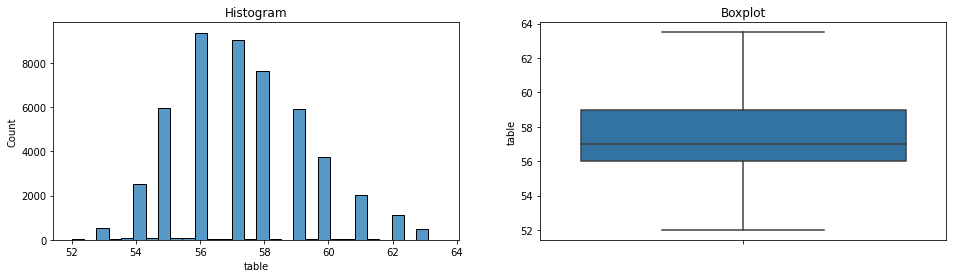

price - Before Trimming


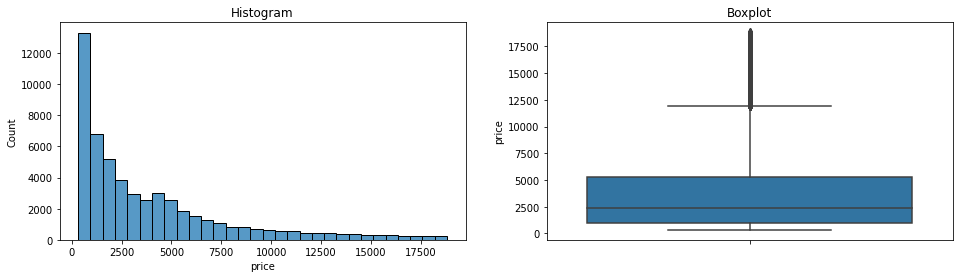


price - After Trimming


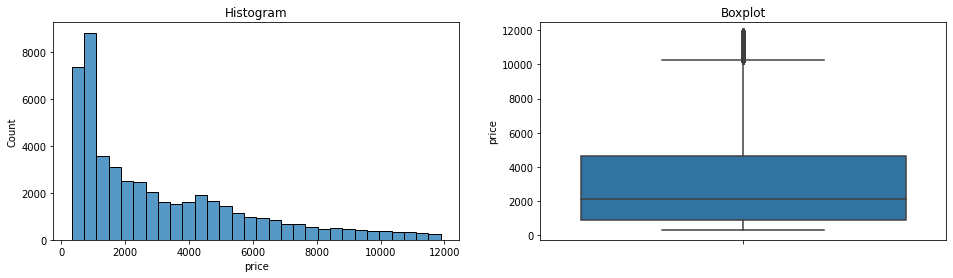

x - Before Trimming


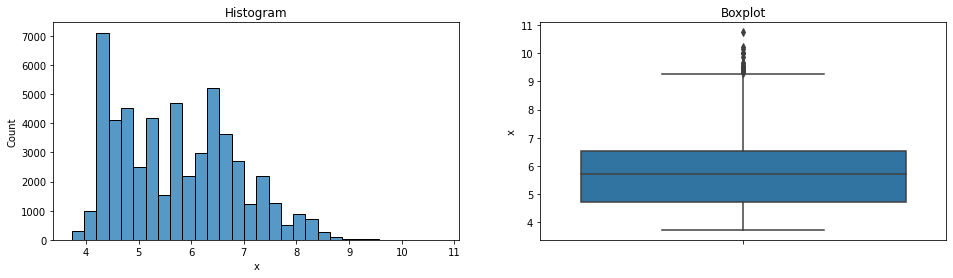


x - After Trimming


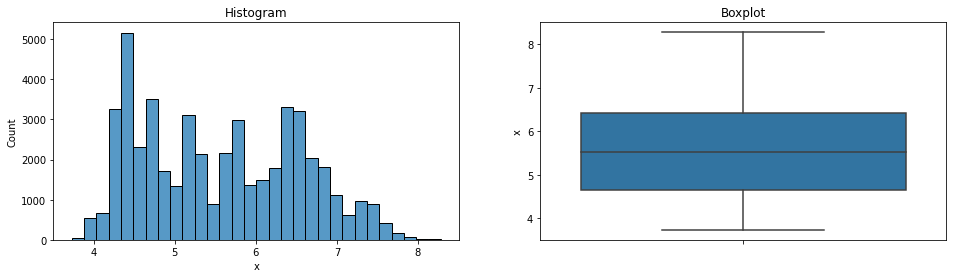

y - Before Trimming


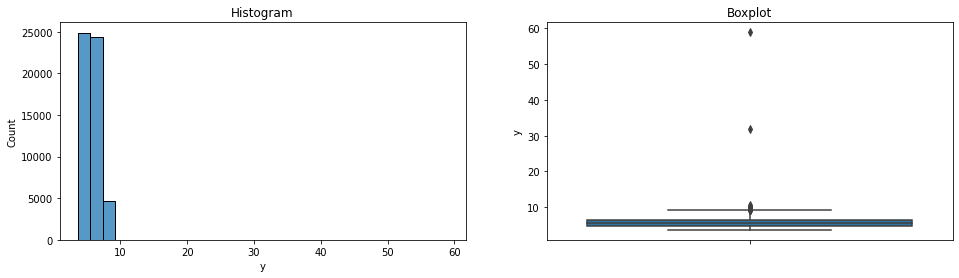


y - After Trimming


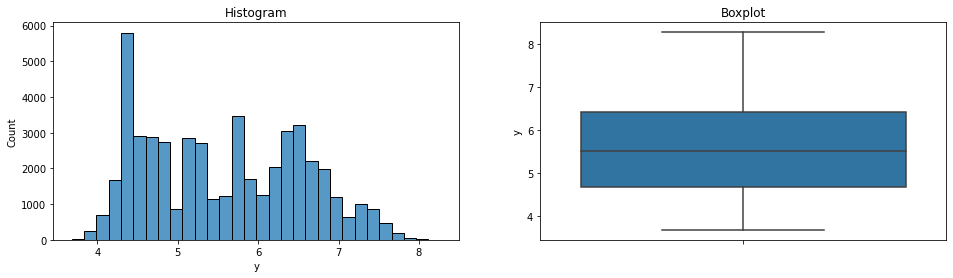

z - Before Trimming


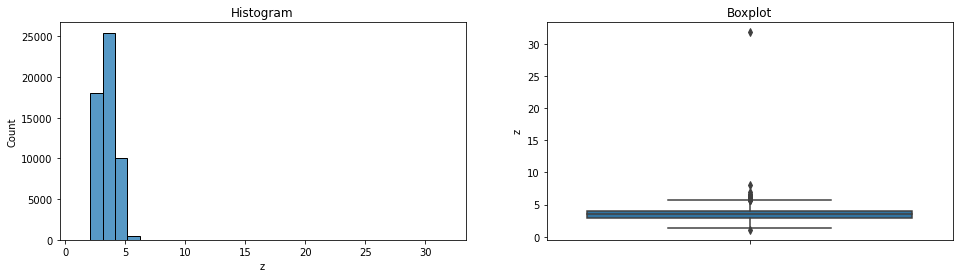


z - After Trimming


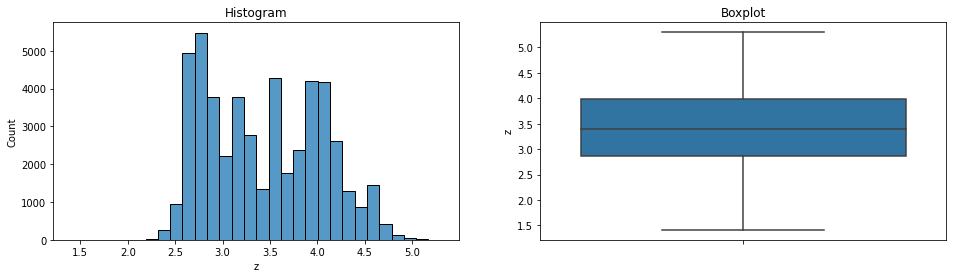

In [163]:
for col in diamonds_dropped.describe().columns:
  print(f"{col} - Before Trimming")
  diagnostic_plot(diamonds_dropped, col)
  print(f"\n{col} - After Trimming")
  diagnostic_plot(diamonds_trimmed, col)

# Exploratory Data Analysis (EDA)

*“If we have data, let’s look at data. If all we have are opinions, let’s go with mine.”* - **Jim Barksdale**


How we are going to work with data if we don't know the data itself ?

That's why the next thing to do is to know our data. And in order to do that, we are going to perform EDA to know the big picture of every features we have.

We will use both Univariate and Multivariate Analysis on this cases.

In [164]:
# define numerical and categorical features
numerical_features = list(diamonds_trimmed.select_dtypes(include=np.number).columns)
categorical_features = list(diamonds_trimmed.select_dtypes(include=['object']).columns)
print(f"numerical features: {numerical_features}")
print(f"categorical_features: {categorical_features}")

numerical features: ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
categorical_features: ['cut', 'color', 'clarity']


## Univariate Analysis - Categorical

Univariate analysis is the analysis of **one variable**. We are going to analyze and get the big picture of our categorical features first.

There are 3 categorical features like `cut`, `color`, `clarity`.

In [165]:
def categorical_viz(feature, order=None):
  counts = diamonds_trimmed[feature].value_counts()
  percent = 100*diamonds_trimmed[feature].value_counts(normalize=True)
  df = pd.DataFrame({
      'sample_count': counts,
      'percentage': percent.round(2)
  })
  print(df)
  if order != None: 
    sns.countplot(x=diamonds_trimmed[feature],
                  order=order)
  else:
    sns.countplot(x=diamonds_trimmed[feature],
                  order=diamonds_trimmed[feature].value_counts().index)
  
  plt.title(feature + ' count plot')
  plt.show()

### Cut

`cut` is quality of the cut (Fair, Good, Very Good, Premium, Ideal)

           sample_count  percentage
Ideal             20358       41.47
Premium           12455       25.37
Very Good         11262       22.94
Good               4165        8.48
Fair                855        1.74


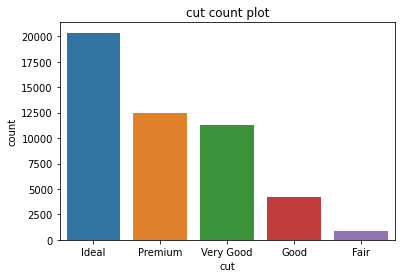

In [166]:
# cut viz
cut_order = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
categorical_viz(categorical_features[0], order=cut_order)

There are 5 categories in the Cut feature, sequentially from the highest number, namely: Ideal, Premium, Very Good, Good, and Fair. From the percentage data, we can conclude that more than 60% of the samples are high grade type diamonds, namely Ideal and Premium grades.

### Color

`color` is diamond colour, from J (worst) to D (best)

   sample_count  percentage
G         10355       21.09
E          9211       18.76
F          8797       17.92
H          7404       15.08
D          6391       13.02
I          4609        9.39
J          2328        4.74


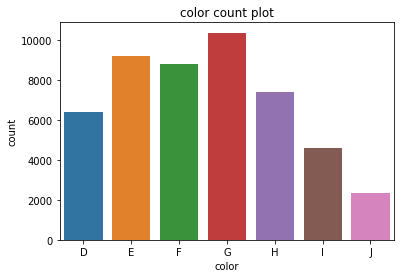

In [167]:
# color viz
color_order = list(string.ascii_uppercase[3:10]) # best to worst(D-J)
categorical_viz(categorical_features[1], order=color_order)

From the color graph above from D - J (best - worst), we can conclude that most of the grades are in the middle grade, specifically **G, F, H**.

### Clarity

`clarity`: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))


      sample_count  percentage
SI1          11972       24.39
VS2          11220       22.85
SI2           7844       15.98
VS1           7555       15.39
VVS2          4792        9.76
VVS1          3503        7.14
IF            1678        3.42
I1             531        1.08


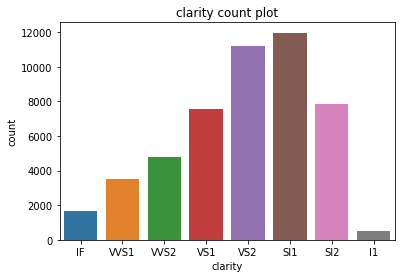

In [168]:
# clarity viz
clarity_order = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'] # best-worst
categorical_viz(categorical_features[2], order=clarity_order)

From the clarity graph above from IF - I1 (Best - Worst), we can conclude that most of the features are low grade, specifically SI1, SI2, and VS2.

## Univariate Analysis - Numerical

We are going to look at histogram of each numerical features to get the big picture of it.

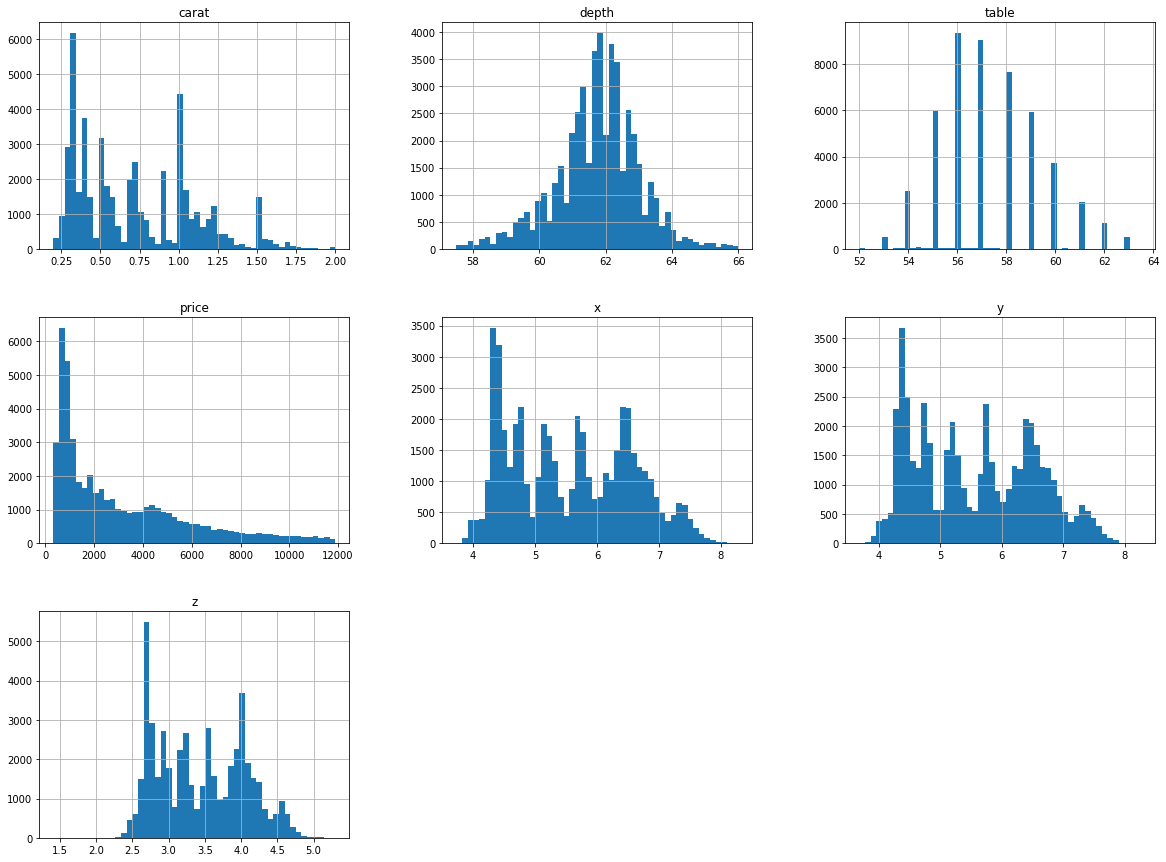

In [169]:
diamonds_trimmed.hist(bins=50, figsize=(20, 15))
plt.show()

Let's look at the table above especially for the 'price' part that is the target of our feature. From the histogram 'price' we can get some information, among others:

* The increase in the price of diamonds is proportional to the decrease in the number of samples. Probably because the rules of supply and demand.

* Diamonds price range is quite high from hundreds of US dollars to 18000$

* Half the price of diamonds is under 2500$

* Price distribution skewed to the right (Right-Skewed). This of course will have an impact on the model later.

## Multivariate Analysis - Categorical

Multivariate EDA shows the relationship between two or more variables in the data. Multivariate EDA that shows the relationship between two variables is commonly referred to as bivariate EDA

In this section, we are going to focus on relationship between categorical features and target features(`price`)

We are going to set the the visualization from best quality to worst quality so we can easily get the big picture or insight from it.

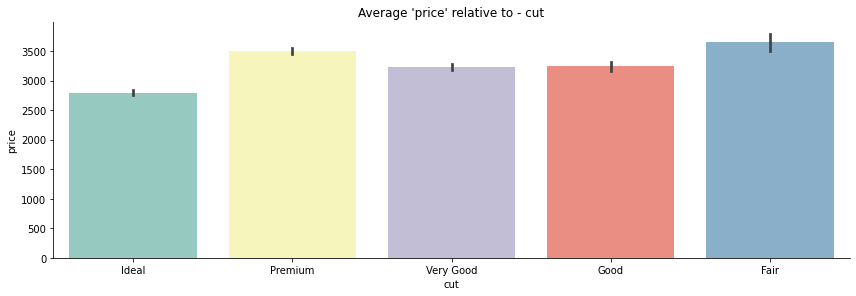

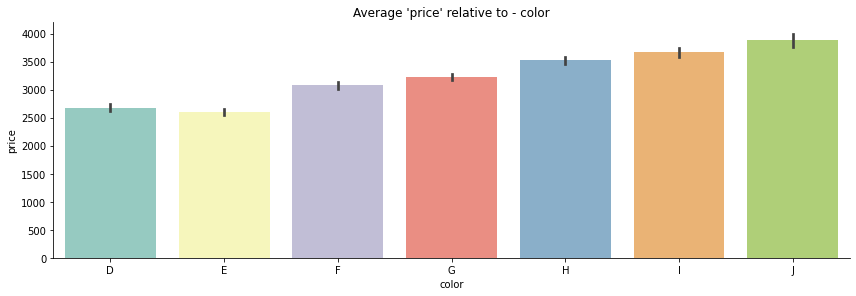

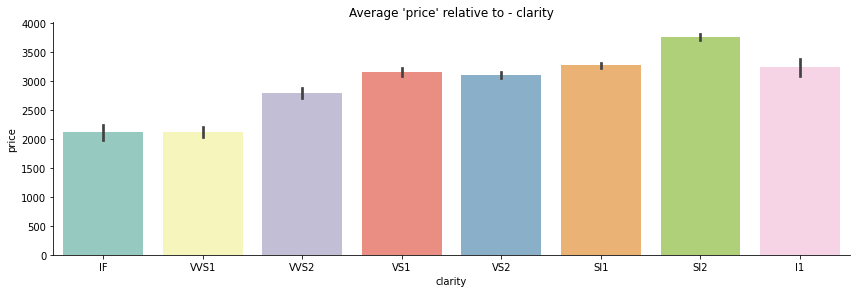

In [170]:
# categorical features
cat_features = diamonds_trimmed.select_dtypes(include=['object']).columns.to_list()
cat_order = [cut_order, color_order, clarity_order]
cat_dict = dict(zip(cat_features, cat_order))

for col, order in cat_dict.items():
  sns.catplot(x=col, y='price', data=diamonds_trimmed, kind='bar', dodge=False, height=4, aspect=3, palette='Set3', order=order)
  plt.title(f"Average 'price' relative to - {col}")

By looking at the averages on the relative prices of the above category features, we can gain the following insights:

- In the `cut` feature, the average prices tend to be similar. the range is between 3500 to 4500. Surprisingly the highest grade Ideal has the lowest average price among the other grades. So the `cut` feature has little effect on the average price.

- In the `color` feature, the lower the color grade, the higher the price of diamonds. From this we can conclude that color has little effect on the average price of diamonds.

- In the `clarity` feature, low grade diamonds actually have a higher price. We also can conclude that 'clarity' also has a small effect on the average price of diamonds.

- From the three conclusions above, it can be explained that the category feature has a low influence on the average price of diamonds.

## Multivariate Analysis - Numerical

To observe the relationship between numeric features, we will use the `pairplot()` function. We will also observe the correlation between numeric features and target features using the `corr()` function to see their correlation.

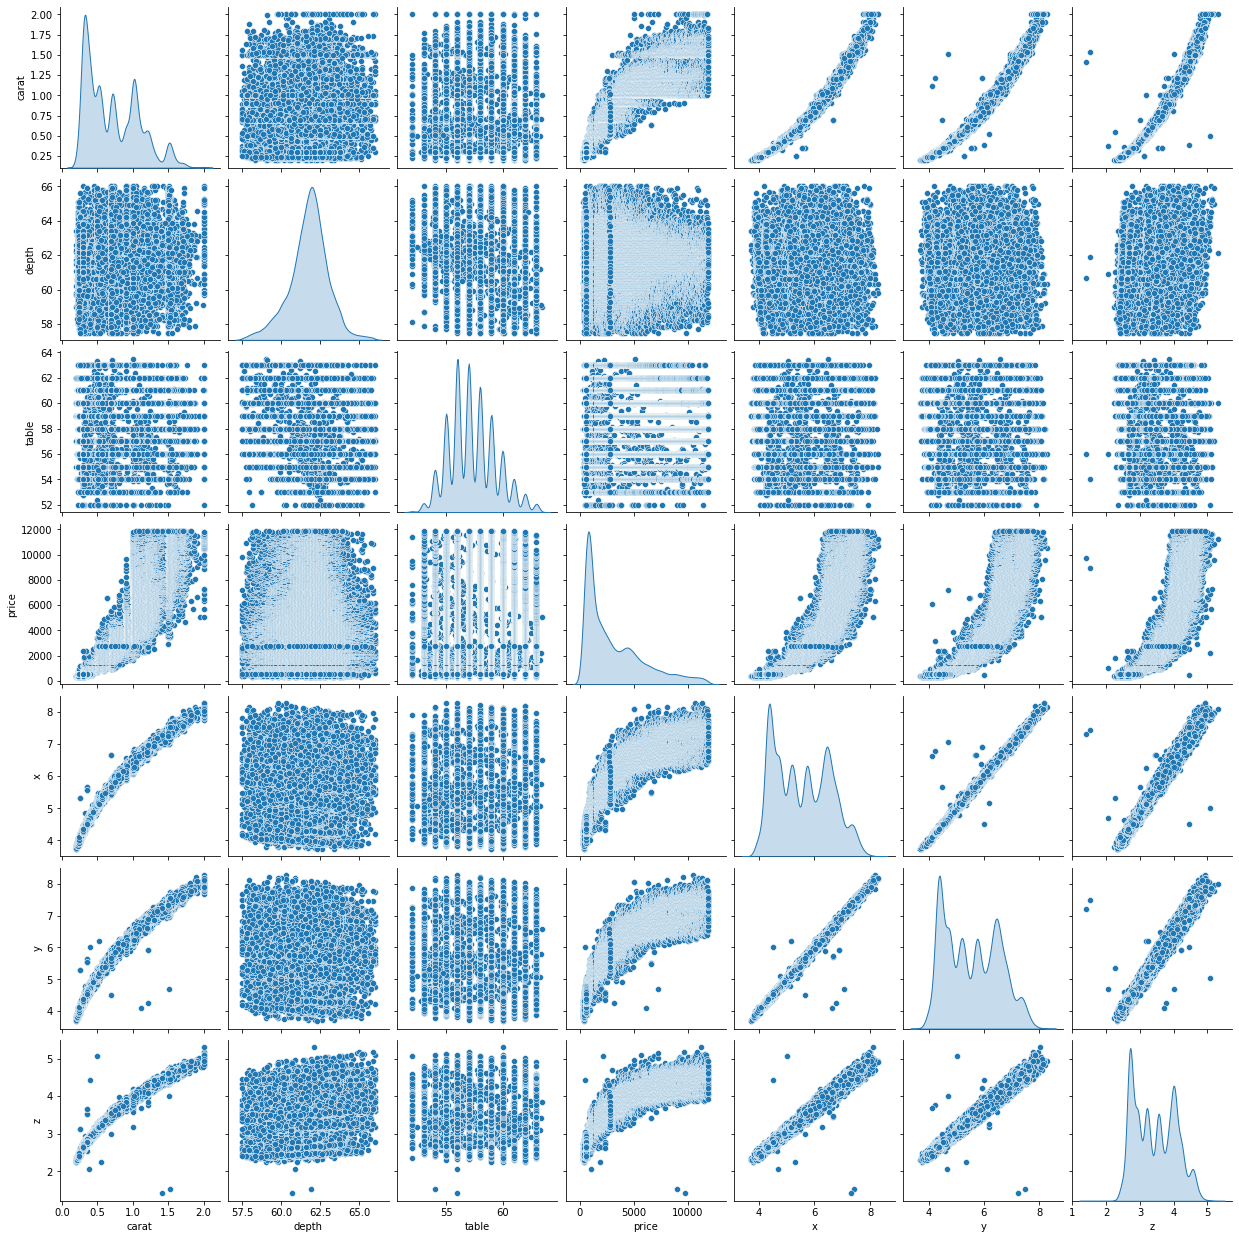

In [171]:
# observe relationship between numerical features with pair plot
sns.pairplot(diamonds_trimmed, diag_kind='kde')

Here we will only see the correlation between numeric features and target('price') features. In the 4th row of the y-axis, we can see the correlation between features and targets. And it turns out that the carat, x, y, z features have a high correlation value (forming a pattern).

To make it easier for us, let's see the correlation between features, we will use the evaluation function `corr()` and visualize in the `heatmap()` function.

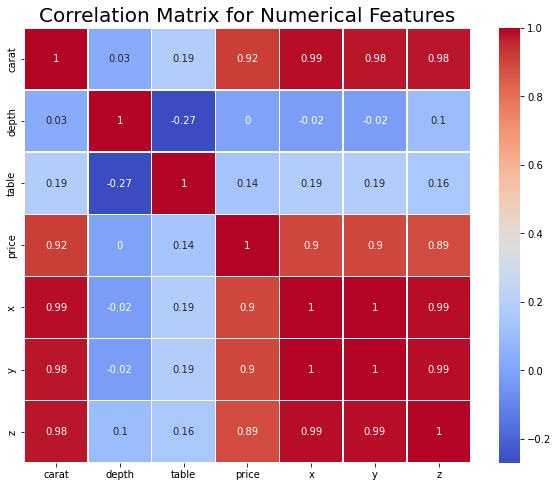

In [172]:
# correlation with heatmap
plt.figure(figsize=(10,8))
correlation_matrix = diamonds_trimmed.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix for Numerical Features", size=20)
plt.show()

`carat`, `x`, `y`, `z` have a high correlation value (0.9) and the `depth` feature has a very low correlation value of 0.1 (almost zero), therefore we will drop the depth feature because it has no effect on our model later.

In [173]:
diamonds_trimmed.drop(['depth'], inplace=True, axis=1)
diamonds_trimmed.head()

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,57.0,336,3.94,3.96,2.48


# Data Preparation

Before entering the model training stage, we need to do data preparation first with several stages that must be passed, such as:

- Encoding Categorical Feautures

- Dimension Reduction with PCA (Principal Component Analysis)

- Splitting the dataset into train and test

- Standardization(Standard Scaler)

## Encoding Categorical Features

We are going to use OneHotEncoder approach to encode our categorical features.

In [174]:
from sklearn.preprocessing import OneHotEncoder

diamonds_trimmed = pd.concat([diamonds_trimmed, pd.get_dummies(diamonds_trimmed['cut'], prefix='cut', drop_first=True)], axis=1)
diamonds_trimmed = pd.concat([diamonds_trimmed, pd.get_dummies(diamonds_trimmed['color'], prefix='color',drop_first=True)],axis=1)
diamonds_trimmed = pd.concat([diamonds_trimmed, pd.get_dummies(diamonds_trimmed['clarity'], prefix='clarity', drop_first=True)], axis=1)
diamonds_trimmed.drop(['cut','color','clarity'], axis=1, inplace=True)
diamonds_trimmed.head()

,carat,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,55.0,326,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,61.0,326,3.89,3.84,2.31,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0.29,58.0,334,4.20,4.23,2.63,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,58.0,335,4.34,4.35,2.75,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5,0.24,57.0,336,3.94,3.96,2.48,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


## Dimensional Reduction with PCA

If we look again at the pairplot during multivariate analysis, we can see that there is a strong correlation between the x, y, z columns. That's probably because the columns have similar information to each other

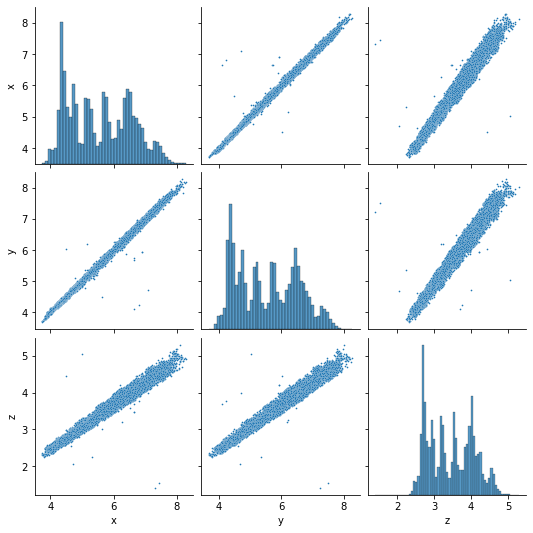

In [175]:
sns.pairplot(diamonds_trimmed[['x','y','z']], plot_kws={'s':3})

We are going to use PCA to reduce `x`, `y`, `z` columns into one.

In [176]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=123)
pca.fit(diamonds_trimmed[['x','y','z']])
princ_comp = pca.transform(diamonds_trimmed[['x','y','z']])

In [177]:
pca.explained_variance_ratio_.round(3)

array([0.997, 0.002, 0.001])

As we can see 99.7% information are in the component one. That's mean we can drop the other 2 and keep the one with majority of information.

In [178]:
pca = PCA(n_components=1, random_state=123)
pca.fit(diamonds_trimmed[['x','y','z']])
diamonds_trimmed['dimension'] = pca.transform(diamonds_trimmed.loc[:, ('x','y','z')]).flatten()
diamonds_trimmed.drop(['x','y','z'], axis=1, inplace=True)
diamonds_trimmed.head()

,carat,table,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,dimension
0,0.23,55.0,326,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,-2.475304
1,0.21,61.0,326,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,-2.652744
3,0.29,58.0,334,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,-2.071272
4,0.31,58.0,335,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,-1.854734
5,0.24,57.0,336,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,-2.474729


## Train Test Split

In [179]:
# split test
X = diamonds_trimmed.drop('price', axis=1)
y = diamonds_trimmed['price']

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.1, random_state=123)

In [180]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 49095
Total # of sample in train dataset: 44185
Total # of sample in test dataset: 4910


## Standarization

we are going to use `StandardScaler()` to scale our numerical features.

In [181]:
# scaling
numerical_features = ['carat', 'table', 'dimension']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,carat,table,dimension
24718,-0.900552,1.789167,-0.824359
19296,1.358169,-0.153817,1.335826
494,0.040582,-1.125310,0.208054
14141,0.874157,-0.639563,1.003617
12620,0.766599,0.331929,0.871527


# Modelling

we are going to compare the performance of 3 different models using MSE metric, the models we use is:

1. K-Nearest Neighbour
2. Random Forest
3. AdaBoost

In [182]:
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [193]:
# define comparasion dataframe
models_df = pd.DataFrame(index=['train_mse','test_mse'],
                      columns=['KNN', 'RandomForest','Boosting'])
models_df

,KNN,RandomForest,Boosting
train_mse,NaN,NaN,NaN
test_mse,NaN,NaN,NaN


## K-Nearest Neighbour

In [194]:
# knn regressor
knn= KNeighborsRegressor(n_neighbors=10, n_jobs=-1)
knn.fit(X_train, y_train)

y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

models_df.loc['train_mse', 'KNN'] = mean_squared_error(y_train, y_pred_train_knn)
models_df.loc['test_mse', 'KNN'] = mean_squared_error(y_test, y_pred_test_knn)

## Random Forest

In [195]:
# random forest regressor
rf = RandomForestRegressor(n_estimators= 50, max_depth=16, random_state=55, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

models_df.loc['train_mse','RandomForest'] = mean_squared_error(y_train, y_pred_train_rf)
models_df.loc['test_mse', 'RandomForest'] = mean_squared_error(y_test, y_pred_test_rf)

## AdaBoost

In [196]:
# adaboost regressor
boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)

y_pred_train_boosting = boosting.predict(X_train)
y_pred_test_boosting = boosting.predict(X_test)

models_df.loc['train_mse','Boosting'] = mean_squared_error(y_train, y_pred_train_boosting)
models_df.loc['test_mse', 'Boosting'] = mean_squared_error(y_test, y_pred_test_boosting)

## Evaluation

In [197]:
# evaluate all mse scores
models_df = models_df.T
models_df['train_mse'] = models_df['train_mse'] / 1e3
models_df['test_mse'] = models_df['test_mse'] / 1e3
models_df

,train_mse,test_mse
KNN,228.456146,273.091416
RandomForest,63.50907,151.200072
Boosting,937.252232,870.075492


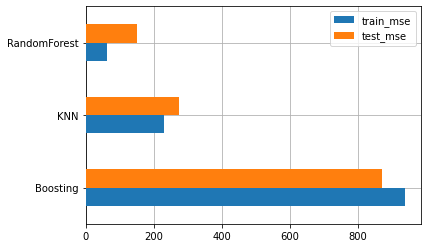

In [198]:
# performace plot
fig, ax = plt.subplots()
models_df.sort_values(by='test_mse', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

The best model for this regression problem is the random forest model. And the worst performing model is the AdaBoost model.

let's take a closer look at their performance comparison.

In [199]:
model_dict = {'KNN': knn, 'RF': rf, 'Boosting': boosting}
prediction = X_test.iloc[[10]].copy()
pred_dict = {'y_true':y_test.iloc[[10]]}
for name, model in model_dict.items():
    pred_dict['prediction_'+name] = model.predict(prediction).round(1)
     
pred_df = pd.DataFrame(pred_dict)
pred_df

,y_true,prediction_KNN,prediction_RF,prediction_Boosting
52720,2555,2258.7,2402.0,2756.8


The best prediction was won by Random Forest with a difference of 153